In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data_ufc.csv")

print(df)



                R_fighter        B_fighter  R_odds  B_odds        R_ev  \
0           Thiago Santos    Johnny Walker  -150.0     130   66.666667   
1           Alex Oliveira       Niko Price   170.0    -200  170.000000   
2          Misha Cirkunov  Krzysztof Jotko   110.0    -130  110.000000   
3     Alexander Hernandez     Mike Breeden  -675.0     475   14.814815   
4             Joe Solecki     Jared Gordon  -135.0     115   74.074074   
...                   ...              ...     ...     ...         ...   
4891         Duane Ludwig    Darren Elkins  -155.0     135   64.516129   
4892          John Howard   Daniel Roberts  -210.0     175   47.619048   
4893       Brendan Schaub    Chase Gormley  -260.0     220   38.461538   
4894          Mike Pierce    Julio Paulino  -420.0     335   23.809524   
4895         Eric Schafer      Jason Brilz   140.0    -160  140.000000   

            B_ev        date                   location country Winner  ...  \
0     130.000000  2021-10-02    

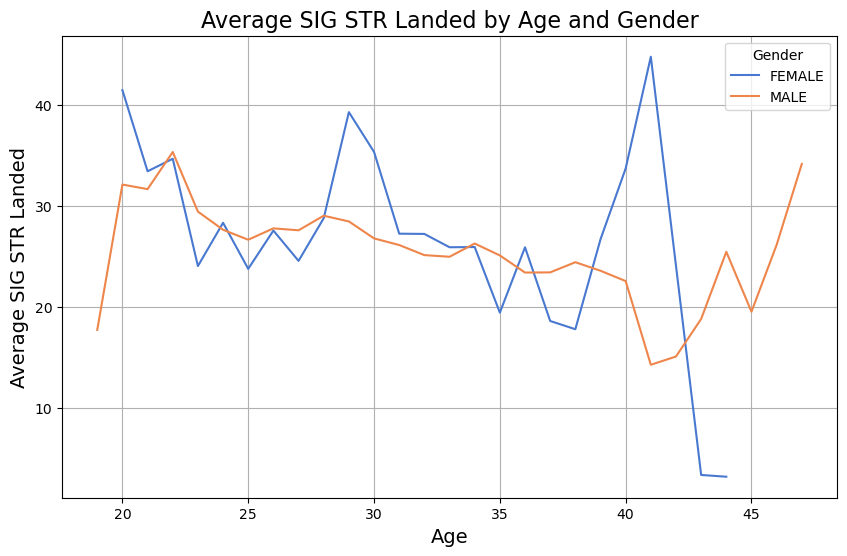

In [31]:
def data_SIG_STR(df): 

    df_blue = df[["B_age", "B_avg_SIG_STR_landed", "gender"]].rename(columns={"B_age": "Age", "B_avg_SIG_STR_landed": "avg_SIG_STR_landed"})
    df_red = df[["R_age", "R_avg_SIG_STR_landed", "gender"]].rename(columns={"R_age": "Age", "R_avg_SIG_STR_landed": "avg_SIG_STR_landed"})
    df =pd.concat([df_blue, df_red], ignore_index=True)
    df = df.groupby(["Age", "gender"])["avg_SIG_STR_landed"].mean().unstack()
    df = df.reset_index()
    
    return df

final =  data_SIG_STR(df)

plt.figure(figsize=(10, 6))
sns.lineplot(data=final.melt(id_vars='Age', value_vars=['FEMALE', 'MALE']), 
             x='Age', y='value', hue='gender', palette='muted')
plt.title('Average SIG STR Landed by Age and Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average SIG STR Landed', fontsize=14)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

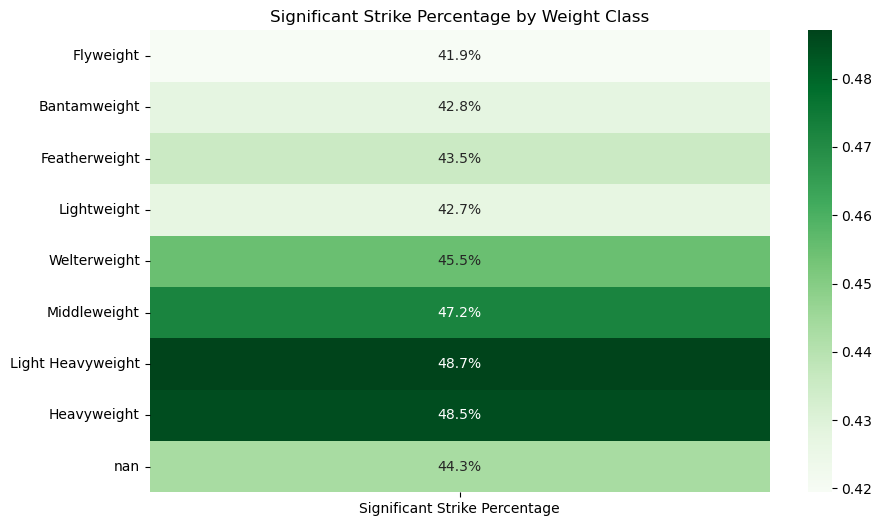

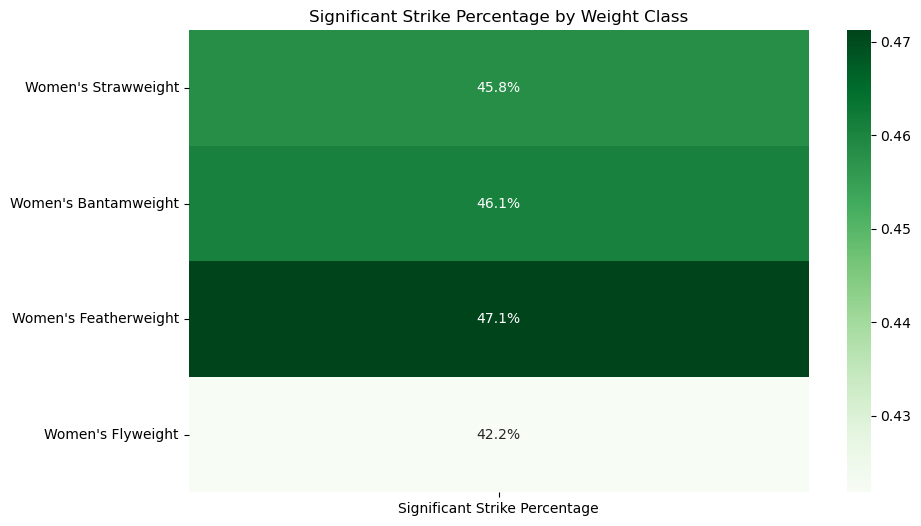

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def data_weight_class(df): 
    df_blue = df[['B_avg_SIG_STR_pct', "weight_class", "gender"]].rename(columns={'B_avg_SIG_STR_pct': 'avg_SIG_STR_pct'})
    df_red = df[['R_avg_SIG_STR_pct', "weight_class", "gender"]].rename(columns={'R_avg_SIG_STR_pct': 'avg_SIG_STR_pct'})
    
    df_combined = pd.concat([df_blue, df_red], ignore_index=True)
    
    df_male = df_combined[df_combined["gender"] == "MALE"].groupby("weight_class")["avg_SIG_STR_pct"].mean().reset_index()
    df_female = df_combined[df_combined["gender"] == "FEMALE"].groupby("weight_class")["avg_SIG_STR_pct"].mean().reset_index()

    return df_male, df_female

def heatmap(df, order):
    df['weight_class'] = pd.Categorical(df['weight_class'], categories=order, ordered=True)
    df_sorted = df.sort_values('weight_class')  
    heatmap_data = df_sorted.set_index('weight_class')['avg_SIG_STR_pct']
    
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(heatmap_data.values.reshape(-1, 1), cmap='Greens', annot=True, fmt='.1%')
    heatmap.set_xticklabels(['Significant Strike Percentage'])
    heatmap.set_yticklabels(heatmap_data.index, rotation=0)
    heatmap.set_title("Significant Strike Percentage by Weight Class")
    plt.show()

new_order_male = ['Flyweight',
                  'Bantamweight',
                  'Featherweight',
                  'Lightweight',
                  'Welterweight',
                  'Middleweight',
                  'Light Heavyweight',
                  'Heavyweight']

new_order_female = ["Women's Strawweight",
                    "Women's Bantamweight",
                    "Women's Featherweight",
                    "Women's Flyweight"]


df_male, df_female = data_weight_class(df)

heatmap(df_male, new_order_male) 
heatmap(df_female, new_order_female)


['MALE' 'FEMALE']
